# Understandind ROC curves, Precision-Recall curves

We will use the following datasets:
* Social_Network_Ads: this dataset is on social network ads and users' click-through. 
*  Employee Retention Data: whether employees will stay with the firm after 2 years

##Data prep1

In [154]:
# make sure to upload the dataset to your colab folder before proceeding (see instructions in "Getting Started with Colab")
#loading the 50_startups datasets as a panda dataframe
import pandas as pd
df = pd.read_csv('Social_Network_Ads.csv')
df.head(2)

,User ID,Gender,Age,EstimatedSalary,Clicked
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0


In [156]:
##preparing the data for model training
y = df[['Clicked']]  
X = df[['Age','EstimatedSalary']] 

None of the potential predictor/input/X variables are categorical, so we won't need to encode them (i.e., dummy or OneHot encoding). 

In [ ]:
X.head(2)

In [ ]:
y.head(2)

## Data prep2

In [ ]:
df2= pd.read_csv('EmployeeRetentionData.csv')
df2.head(2)

In [ ]:
df2=pd.concat([df2,pd.get_dummies(df2['major'])],axis=1) 
df2.drop(['major','OTHR'],axis=1,inplace=True)
df2.head(2)

In [ ]:
y2 = df2[['stayed2yrs']]  
X2 = df2.drop(['stayed2yrs'],axis=1,inplace=False)

## Splitting the data into Train/Test set
You can use either **X, y** or **X2, y2**  to try the two datasets.

We will split the data intro train and test set, try several classifications models, and evaluate their predicitve performance:

In [157]:
import warnings
warnings.filterwarnings('ignore')

In [158]:
#splitting the dataset into training (70%) and testing (30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)


In [159]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
#uncomment ONLY one the following two, depending on how you want to scale the data
#sc = StandardScaler() #standardization
sc = MinMaxScaler() #minmax scaling
X_train_sc=sc.fit_transform(X_train)

##Logistic Regression

In [225]:
#using logistic regression 
from sklearn.linear_model import LogisticRegression
logistic1 = LogisticRegression(random_state = 0, solver='liblinear')
logistic1.fit(X_train_sc, y_train) #fitting the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [226]:
#using the trained model to predict outcome values for the test data (X_test)
y_pred = logistic1.predict(sc.transform(X_test))


In [162]:
!pip install scikit-plot #run once to install library

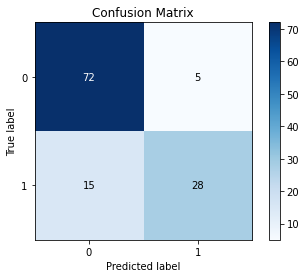

In [163]:
#!pip install scikit-plot #run once to install library
#using scikit plot for model evaluation
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, y_pred) #confusion matrix

In [164]:
from sklearn import metrics
#Let's take a look at model's Precision, Recall, and Accuracy
(metrics.precision_score(y_test, y_pred), #Precision
metrics.recall_score(y_test, y_pred), #Recall
metrics.accuracy_score(y_test, y_pred), #Accuracy
metrics.balanced_accuracy_score(y_test, y_pred)) #Balanced Accuracy

(0.8484848484848485,
 0.6511627906976745,
 0.8333333333333334,
 0.7931138628813048)

In [ ]:
#calculate probabilty of each observation in X-test to belong to either outcome class; Benign=0 , Malignant=1
y_pred_prob=logistic1.predict_proba(sc.fit_transform(X_test))
#y_pred_prob

In [ ]:
X_test

In [232]:
y_pred_prob[:,1]

array([0.51117268, 0.42121955, 0.36149711, 0.10292007, 0.33478017,
       0.28494763, 0.13051725, 0.81000173, 0.4889798 , 0.33321916,
       0.19321182, 0.42942262, 0.60209044, 0.11772376, 0.22014503,
       0.71573573, 0.142822  , 0.21675917, 0.19704516, 0.27153099,
       0.16030391, 0.30292665, 0.0669541 , 0.25676699, 0.20523143,
       0.40179001, 0.11008914, 0.88372618, 0.31431855, 0.46736189,
       0.42337814, 0.27681322, 0.50743647, 0.03935701, 0.32106424,
       0.58479346, 0.31669062, 0.42889941, 0.41202453, 0.4596233 ,
       0.36509642, 0.28538299, 0.34373934, 0.19283161, 0.85590331,
       0.14644549, 0.43106805, 0.73511588, 0.45417225, 0.35693226,
       0.45969909, 0.14420963, 0.79491784, 0.54166469, 0.85480861,
       0.36828488, 0.11728083, 0.58264346, 0.12678936, 0.06082716,
       0.33914276, 0.34181478, 0.38273625, 0.89778206, 0.43548823,
       0.68396927, 0.33675353, 0.88463228, 0.19560096, 0.06503594,
       0.04142612, 0.668879  , 0.28000054, 0.21295052, 0.86700

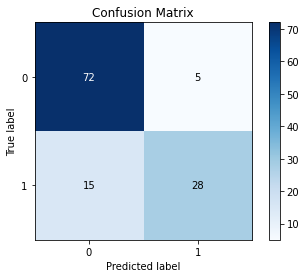

In [238]:
y_pred=logistic1.predict(sc.transform(X_test))
#y_pred=logistic1.predict_proba(sc.transform(X_test))[:,1]>=0.5
(metrics.precision_score(y_test, y_pred), #Precision
metrics.recall_score(y_test, y_pred))#Recall
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

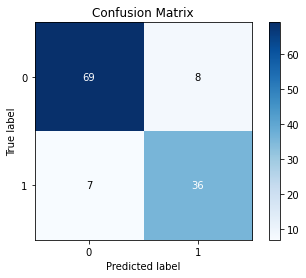

In [236]:
y_pred_thr=logistic1.predict_proba(sc.transform(X_test))[:,1]>=0.435

(metrics.precision_score(y_test, y_pred_thr), #Precision
metrics.recall_score(y_test, y_pred_thr)) #Recall
skplt.metrics.plot_confusion_matrix(y_test, y_pred_thr)

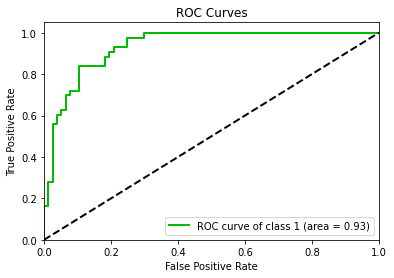

In [169]:
#plotting the ROC curve to evalute the model's aggregate performance
skplt.metrics.plot_roc(y_test,y_pred_prob,classes_to_plot=1,plot_micro=False,plot_macro=False)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

data = {"FPR": fpr, 
        "TPR": tpr, 
        "thresholds": thresholds} 
pd.DataFrame(data,columns=['FPR','TPR','thresholds'])
# first row value is arbitrary  =max(y_pred_prob)+1


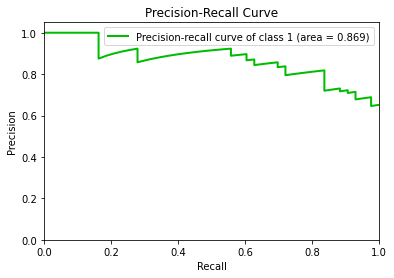

In [173]:
# plotting the precision-recall curve
skplt.metrics.plot_precision_recall(y_test,y_pred_prob,classes_to_plot=1,plot_micro=False)

In [ ]:
precision, recall, thresholds = skplt.metrics.precision_recall_curve(y_test, y_pred_prob[:,1], pos_label=1)


In [ ]:
precision, recall, thresholds

##Decision Tree Classification 

Learn more at https://scikit-learn.org/stable/modules/tree.html#tree 

In [204]:
#using the Decision Tree Classifier from sklearn
from sklearn.tree import DecisionTreeClassifier
DecTree1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 123) #change metric to 'gini' and rerun
DecTree1.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

(0.7916666666666666, 0.8837209302325582, 0.875)

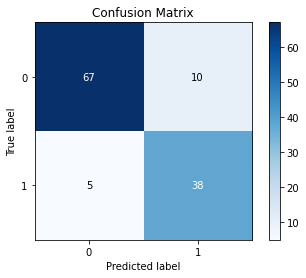

In [199]:
#using the model to predict outcomes for X_test
y_pred = DecTree1.predict(X_test) 
#confusion matrix 
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
#calculating other model evalution metrics
(metrics.precision_score(y_test, y_pred), #Precision
metrics.recall_score(y_test, y_pred), #Recall
metrics.accuracy_score(y_test, y_pred)) #Accuracy

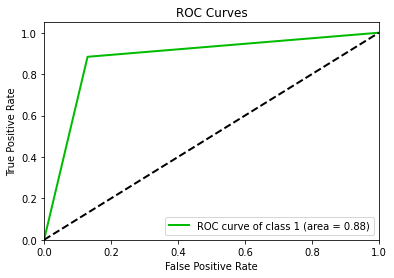

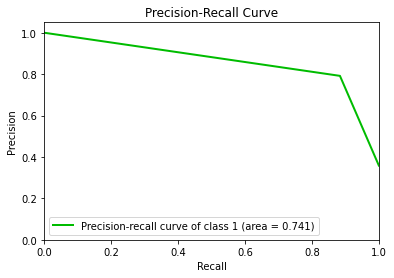

In [201]:
y_pred_prob=DecTree1.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_pred_prob,classes_to_plot=1,plot_micro=False,plot_macro=False)
skplt.metrics.plot_precision_recall(y_test,y_pred_prob,classes_to_plot=1,plot_micro=False)

In [202]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

data = {"FPR": fpr, 
        "TPR": tpr, 
        "thresholds": thresholds} 
pd.DataFrame(data,columns=['FPR','TPR','thresholds'])

,FPR,TPR,thresholds
0,0.00000,0.000000,2.0
1,0.12987,0.883721,1.0
2,1.00000,1.000000,0.0


## RandomForest

In [205]:
from sklearn.ensemble import RandomForestClassifier
RandF1 = RandomForestClassifier(n_estimators = 10,criterion = 'entropy')
RandF1.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [206]:
y_pred = RandF1.predict(X_test) 
#confusion matrix 
#skplt.metrics.plot_confusion_matrix(y_test, y_pred)
#calculating other model evalution metrics
(metrics.precision_score(y_test, y_pred), #Precision
metrics.recall_score(y_test, y_pred), #Recall
metrics.accuracy_score(y_test, y_pred)) #Accuracy

(0.782608695652174, 0.8372093023255814, 0.8583333333333333)

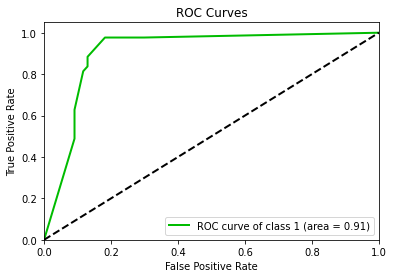

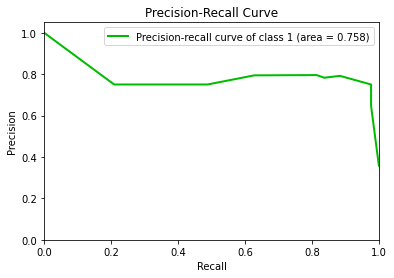

In [208]:
y_pred_prob=RandF1.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_pred_prob,classes_to_plot=1,plot_micro=False,plot_macro=False)
skplt.metrics.plot_precision_recall(y_test,y_pred_prob,classes_to_plot=1,plot_micro=False)

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

data = {"FPR": fpr, 
        "TPR": tpr, 
        "thresholds": thresholds} 
pd.DataFrame(data,columns=['FPR','TPR','thresholds'])

## NaiveBayes

In [210]:
from sklearn.naive_bayes import GaussianNB
NaiveBayes= GaussianNB()
NaiveBayes.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [211]:
y_pred = NaiveBayes.predict(X_test) 
#confusion matrix
#skplt.metrics.plot_confusion_matrix(y_test, y_pred)
#calculating other model evalution metrics
(metrics.precision_score(y_test, y_pred), #Precision
metrics.recall_score(y_test, y_pred), #Recall
metrics.accuracy_score(y_test, y_pred))

(0.8260869565217391, 0.8837209302325582, 0.8916666666666667)

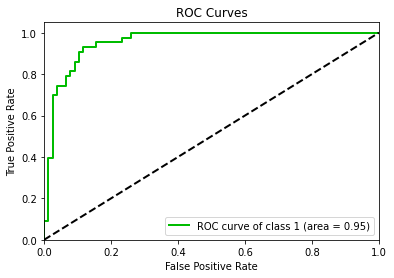

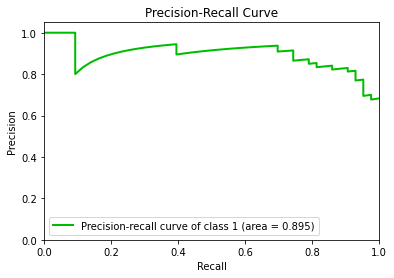

In [213]:
y_pred_prob=NaiveBayes.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_pred_prob,classes_to_plot=1,plot_micro=False,plot_macro=False)
skplt.metrics.plot_precision_recall(y_test,y_pred_prob,classes_to_plot=1,plot_micro=False)

In [214]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

data = {"FPR": fpr, 
        "TPR": tpr, 
        "thresholds": thresholds} 
pd.DataFrame(data,columns=['FPR','TPR','thresholds'])

,FPR,TPR,thresholds
0,0.000000,0.000000,1.999631
1,0.000000,0.023256,0.999631
2,0.000000,0.093023,0.998672
3,0.012987,0.093023,0.997323
4,0.012987,0.395349,0.938107
5,0.025974,0.395349,0.926082
6,0.025974,0.697674,0.751693
7,0.038961,0.697674,0.720518
8,0.038961,0.744186,0.667753
9,0.064935,0.744186,0.614590


## K-NN

In [215]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [216]:
y_pred = KNN.predict(X_test) 

(metrics.precision_score(y_test, y_pred), #Precision
metrics.recall_score(y_test, y_pred), #Recall
metrics.accuracy_score(y_test, y_pred))

(0.6904761904761905, 0.6744186046511628, 0.775)

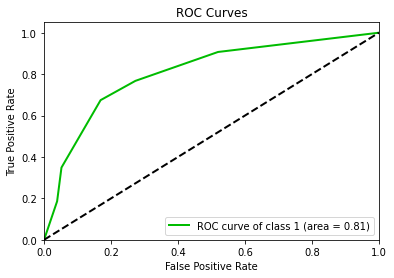

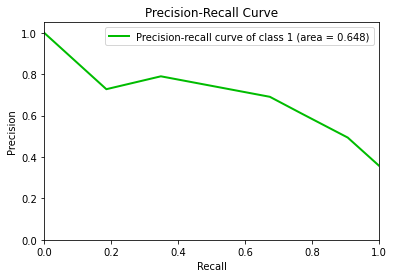

In [220]:
y_pred_prob=KNN.predict_proba(X_test)
skplt.metrics.plot_roc(y_test,y_pred_prob,classes_to_plot=1,plot_micro=False,plot_macro=False)
skplt.metrics.plot_precision_recall(y_test,y_pred_prob,classes_to_plot=1,plot_micro=False)

In [221]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

data = {"FPR": fpr, 
        "TPR": tpr, 
        "thresholds": thresholds} 
pd.DataFrame(data,columns=['FPR','TPR','thresholds'])

,FPR,TPR,thresholds
0,0.000000,0.000000,2.0
1,0.038961,0.186047,1.0
2,0.051948,0.348837,0.8
3,0.168831,0.674419,0.6
4,0.272727,0.767442,0.4
5,0.519481,0.906977,0.2
6,1.000000,1.000000,0.0


In [222]:
KNN.predict_proba(X_test)[:,1]

array([0.6, 1. , 0. , 0. , 0. , 0.2, 0. , 0.8, 0.2, 0.6, 0. , 0.2, 0. ,
       0. , 0.2, 0. , 0. , 0.6, 0.2, 0. , 0.4, 0. , 0. , 1. , 0. , 0.6,
       0. , 1. , 0. , 0.2, 0.6, 0.2, 0.6, 0.4, 0. , 1. , 0. , 0. , 0.6,
       0. , 0.2, 0. , 0.2, 0.2, 0.8, 0.4, 0. , 1. , 0.6, 0. , 0.8, 0. ,
       0.2, 1. , 0.4, 0.6, 0. , 0.8, 0. , 0. , 0.8, 0.6, 0.8, 0.6, 0.4,
       0.4, 0. , 1. , 0. , 0. , 0.6, 0.6, 0.2, 0. , 1. , 0.6, 0.6, 0.6,
       0.2, 1. , 0.6, 0.6, 0. , 0.6, 0. , 0.2, 0. , 0.4, 0. , 0.2, 0.4,
       0. , 0.2, 0.2, 0. , 0.2, 0.8, 0.6, 0.4, 0. , 0.4, 0.6, 0. , 0.6,
       0.2, 0.2, 0.2, 0. , 0.2, 0.8, 0.2, 0.2, 1. , 0. , 0.6, 0.4, 0.2,
       0. , 1. , 0.4])

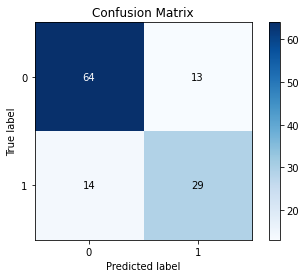

In [223]:
y_pred=KNN.predict(X_test)

(metrics.precision_score(y_test, y_pred), #Precision
metrics.recall_score(y_test, y_pred))#Recall
skplt.metrics.plot_confusion_matrix(y_test, y_pred)

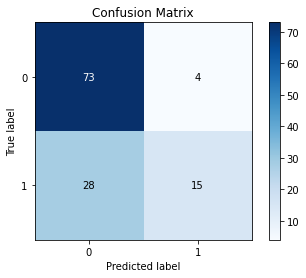

In [224]:
y_pred_thr=KNN.predict_proba(X_test)[:,1]>=0.8
(metrics.precision_score(y_test, y_pred_thr), #Precision
metrics.recall_score(y_test, y_pred_thr)) #Recall
skplt.metrics.plot_confusion_matrix(y_test, y_pred_thr)